# **Actividad: Análisis exploratorio con técnicas de agrupamiento**

Héctor Manuel Cárdenas Yáñez - A01634615

In [ ]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_som.som import SOM

# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

In [ ]:
# Definimos función para plotting
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

## 0. Pre-Análisis

In [ ]:
# Cargar los datos
df = pd.read_csv('/content/country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Lista de Columnas
columnas = df.columns.tolist()
print(columnas)

['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


<ipython-input-6-9e84c8d1f7c3>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')


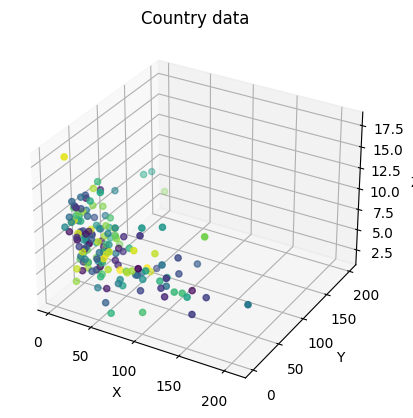

In [ ]:
# Graficamos los datos
cmap = plt.get_cmap('viridis')
points = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].values
labels = df['country']
colors = cmap(np.linspace(0, 1, len(labels)))
plot_data(points, colors, 'Country data')

## 1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

----- K-means -----
Labels:  [4 0 0 4 9 9 4 2 2 0 5 5 4 9 0 3 0 4 4 4 0 0 9 8 0 4 4 4 4 2 4 4 4 9 0 0 4
 4 4 0 4 9 5 5 2 0 0 0 0 5 4 9 0 3 3 9 4 4 3 4 5 0 4 4 4 4 4 9 3 4 0 9 0 2
 5 3 0 3 0 9 4 4 8 4 4 9 9 4 4 9 9 7 0 4 4 9 0 4 5 4 9 4 4 0 0 4 4 4 0 4 2
 3 4 4 1 5 4 9 0 0 4 9 5 6 9 9 4 4 5 4 0 9 4 8 9 5 4 0 5 5 0 0 4 0 2 1 4 4
 0 4 4 4 0 9 0 4 0 2 3 2 9 4 4 9 4 4 4]
Centers:  [[2.31945946e+01 4.01513514e+01 6.41756757e+00 4.51081081e+01
  1.07508108e+04 7.87324324e+00 7.20324324e+01 2.32864865e+00
  5.00891892e+03]
 [3.85000000e+00 5.18500000e+01 1.04900000e+01 4.09000000e+01
  5.89000000e+04 3.13350000e+00 8.16000000e+01 1.73500000e+00
  8.12000000e+04]
 [5.15555556e+00 5.13333333e+01 1.05233333e+01 4.59444444e+01
  4.56000000e+04 2.27355556e+00 8.01222222e+01 1.83222222e+00
  4.87444444e+04]
 [4.12222222e+00 3.73666667e+01 1.01455556e+01 3.55777778e+01
  3.75000000e+04 1.46977778e+00 8.10222222e+01 1.81000000e+00
  4.08666667e+04]
 [7.44707692e+01 2.85599846e+01 6.24676923e+00 4.6130

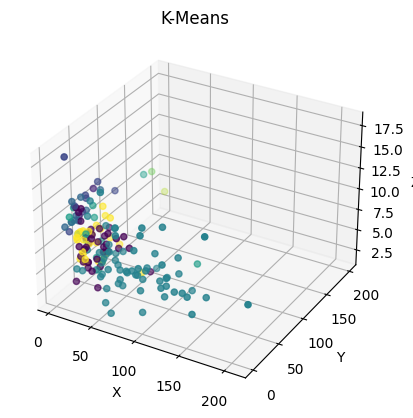

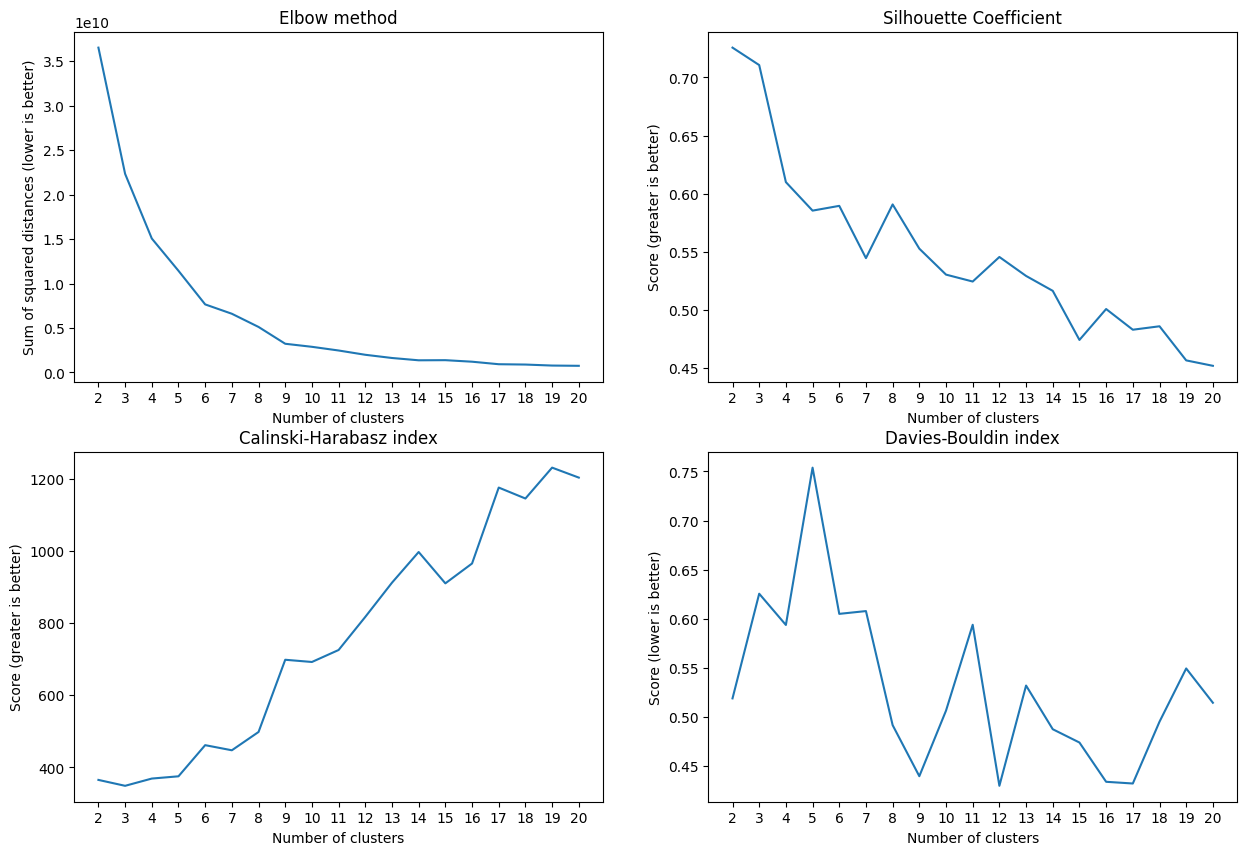

In [ ]:
# K-means
print('----- K-means -----')

kmeans = KMeans(n_clusters=10, n_init='auto').fit(points)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

plot_data(points, clustering_labels, 'K-Means')

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

## 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

Labels:  [3 3 3 3 3 3 3 6 6 3 0 0 3 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 6 3 3 3 3 0 3 3 3 6 6 3 3 3 6 3 0 3 3 3 3 3 3 3 6 3 3 3 3 6
 0 6 3 6 3 3 3 3 2 3 3 3 3 3 3 0 3 4 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 6
 0 3 3 1 0 3 3 3 3 3 3 0 5 3 3 3 3 0 3 3 3 3 2 0 0 3 3 0 0 3 3 3 3 6 1 3 3
 3 3 3 3 3 3 3 3 3 7 6 6 3 3 3 3 3 3 3]


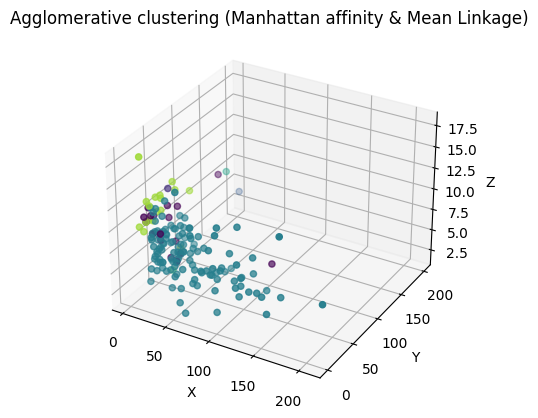

In [ ]:
# Usando custom distance matrix
dist = pairwise_distances(points, metric='l1')
agl = AgglomerativeClustering(n_clusters=8, linkage='average', metric='precomputed').fit(dist)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(points, clustering_labels, 'Agglomerative clustering (Manhattan affinity & Mean Linkage)')

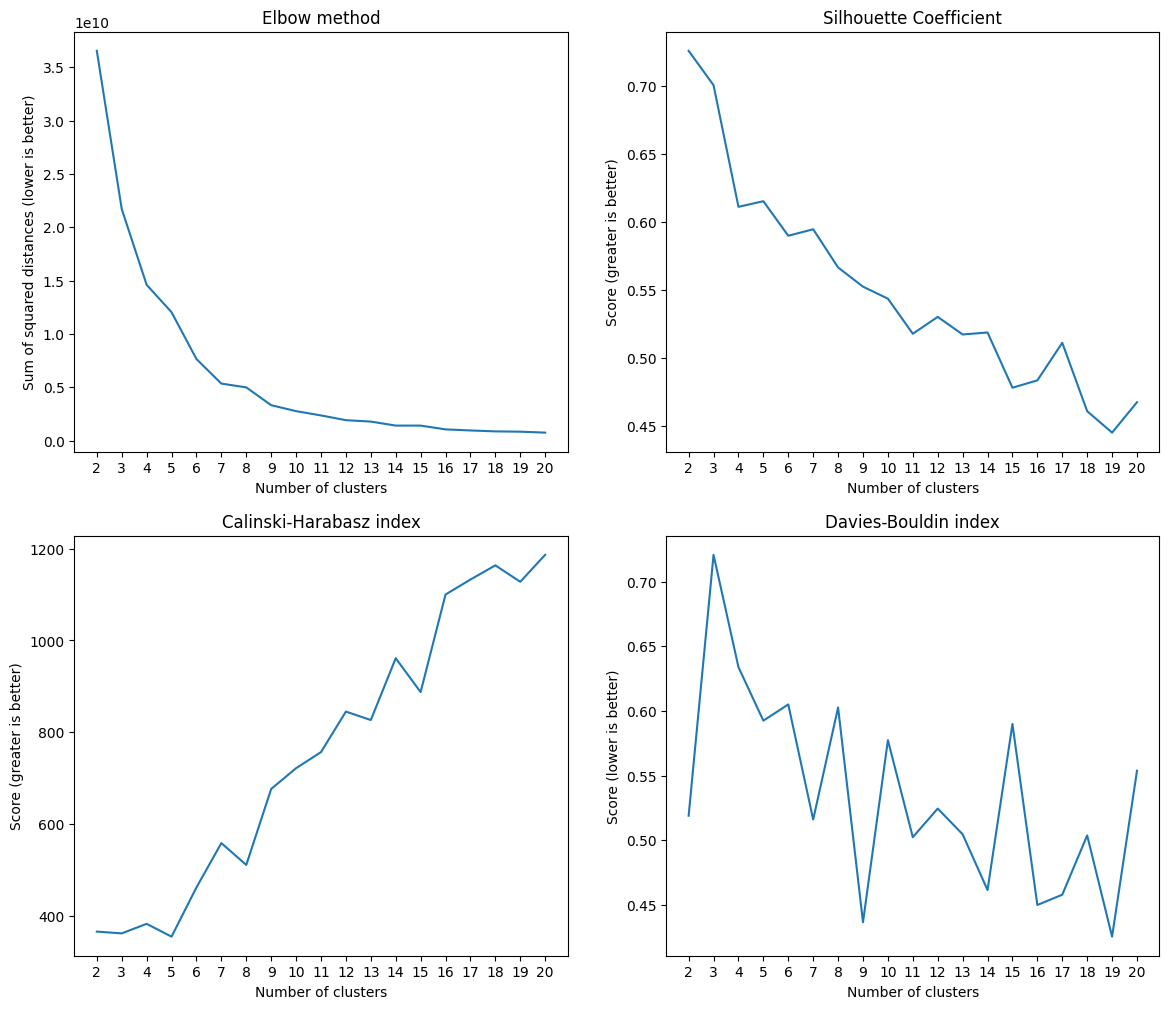

In [ ]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel('Number of clusters')
axs[0][1].set_ylabel('Score (greater is better)')
axs[0][1].set_title('Silhouette Coefficient')
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')
axs[1][0].set_title('Calinski-Harabasz index')
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')
axs[1][1].set_title('Davies-Bouldin index')
axs[1][1].set_xticks(ks)

plt.show()

## 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

In [ ]:
!pip install sklearn-som

In [ ]:
#
data_som = SOM(m=10, n=10, dim=9)
data_som.fit(points)
predictions = data_som.predict(points)

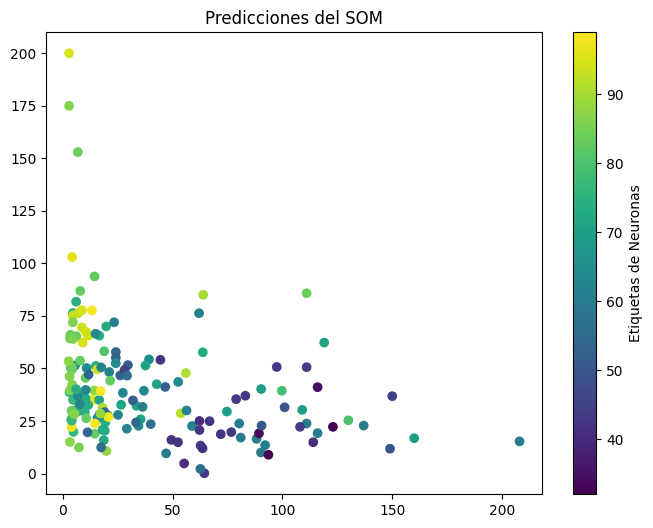

In [ ]:
#
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=predictions, cmap='viridis')
plt.title('Predicciones del SOM')
plt.colorbar(label='Etiquetas de Neuronas')
plt.show()

## 4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Siendo completamente honestos en un inicio no tenía idea de cómo se agruparian los paises, osea en base a cuáles criterios tenderian agruparse más. Pensaba que simplemente se agruparían por gdpp o income, imports y exports. Cabe mencionar que no tenía idea de cómo se agruparian, ya viéndolo de manera visual tiene más sentido y es más sencillo de comprender. El algoritmo lo divide mucho por regiones y gdpp, dependiendo de número de clusters que le pones.

In [ ]:
# Guardar en Drive como PDF
!apt-get install -y texlive-xetex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Agrupamiento.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Agrupamiento.ipynb to pdf
[NbConvertApp] Support files will be in Agrupamiento_files/
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Making directory ./Agrupamiento_files
[NbConvertApp] Writing 51865 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 492443 bytes to /content/drive/MyDrive/Colab Notebooks/Agrupamiento.pdf
